# Hospital Readmissions Prediction

# <a id="1"></a> 1. Exploratory Data Analysis

## Importing Libraries

In [73]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes      import GaussianNB
from sklearn.preprocessing    import StandardScaler, Normalizer
from sklearn.feature_selection import SequentialFeatureSelector

In [74]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading Data

In [75]:
data = pd.read_csv('diabetic_data.csv')
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)
display_all(data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [76]:
data.shape

(101766, 50)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


## Target Distribution (Readmitted)

Target content changed to 1-0

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

NO and >30: 0 <br>
<30 : 1

In [79]:
data.readmitted = [1 if each=='<30' else 0 for each in data.readmitted]

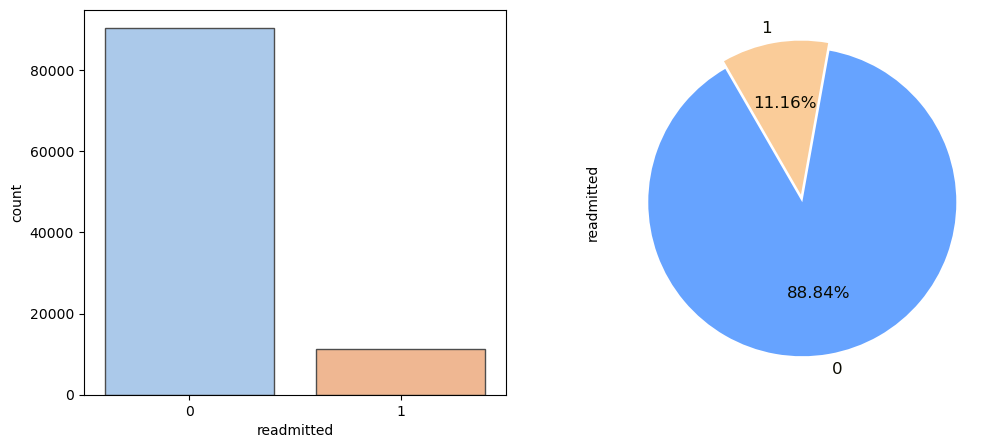

In [80]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=data.readmitted, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [81]:
data.replace('?', np.nan , inplace=True)

## Information about Missing values

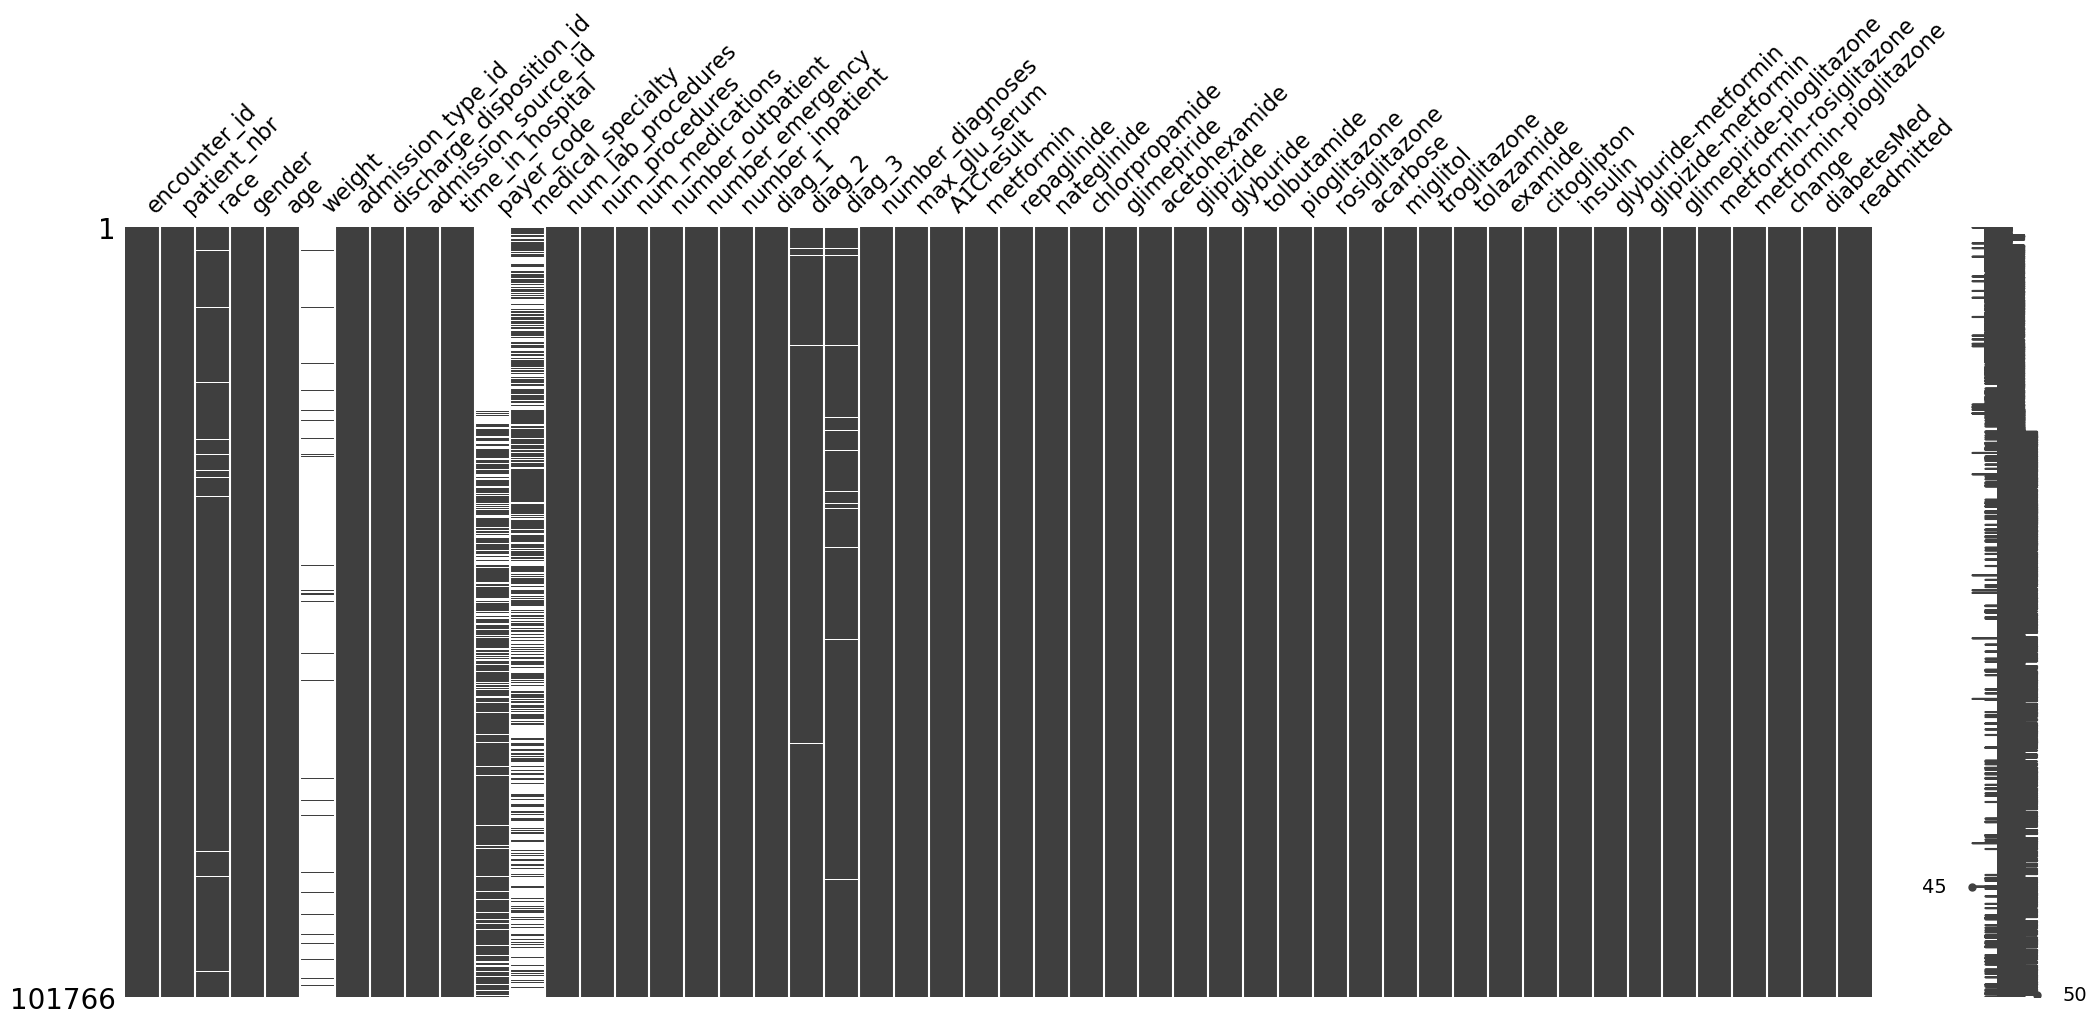

In [82]:
msno.matrix(data)
plt.show()

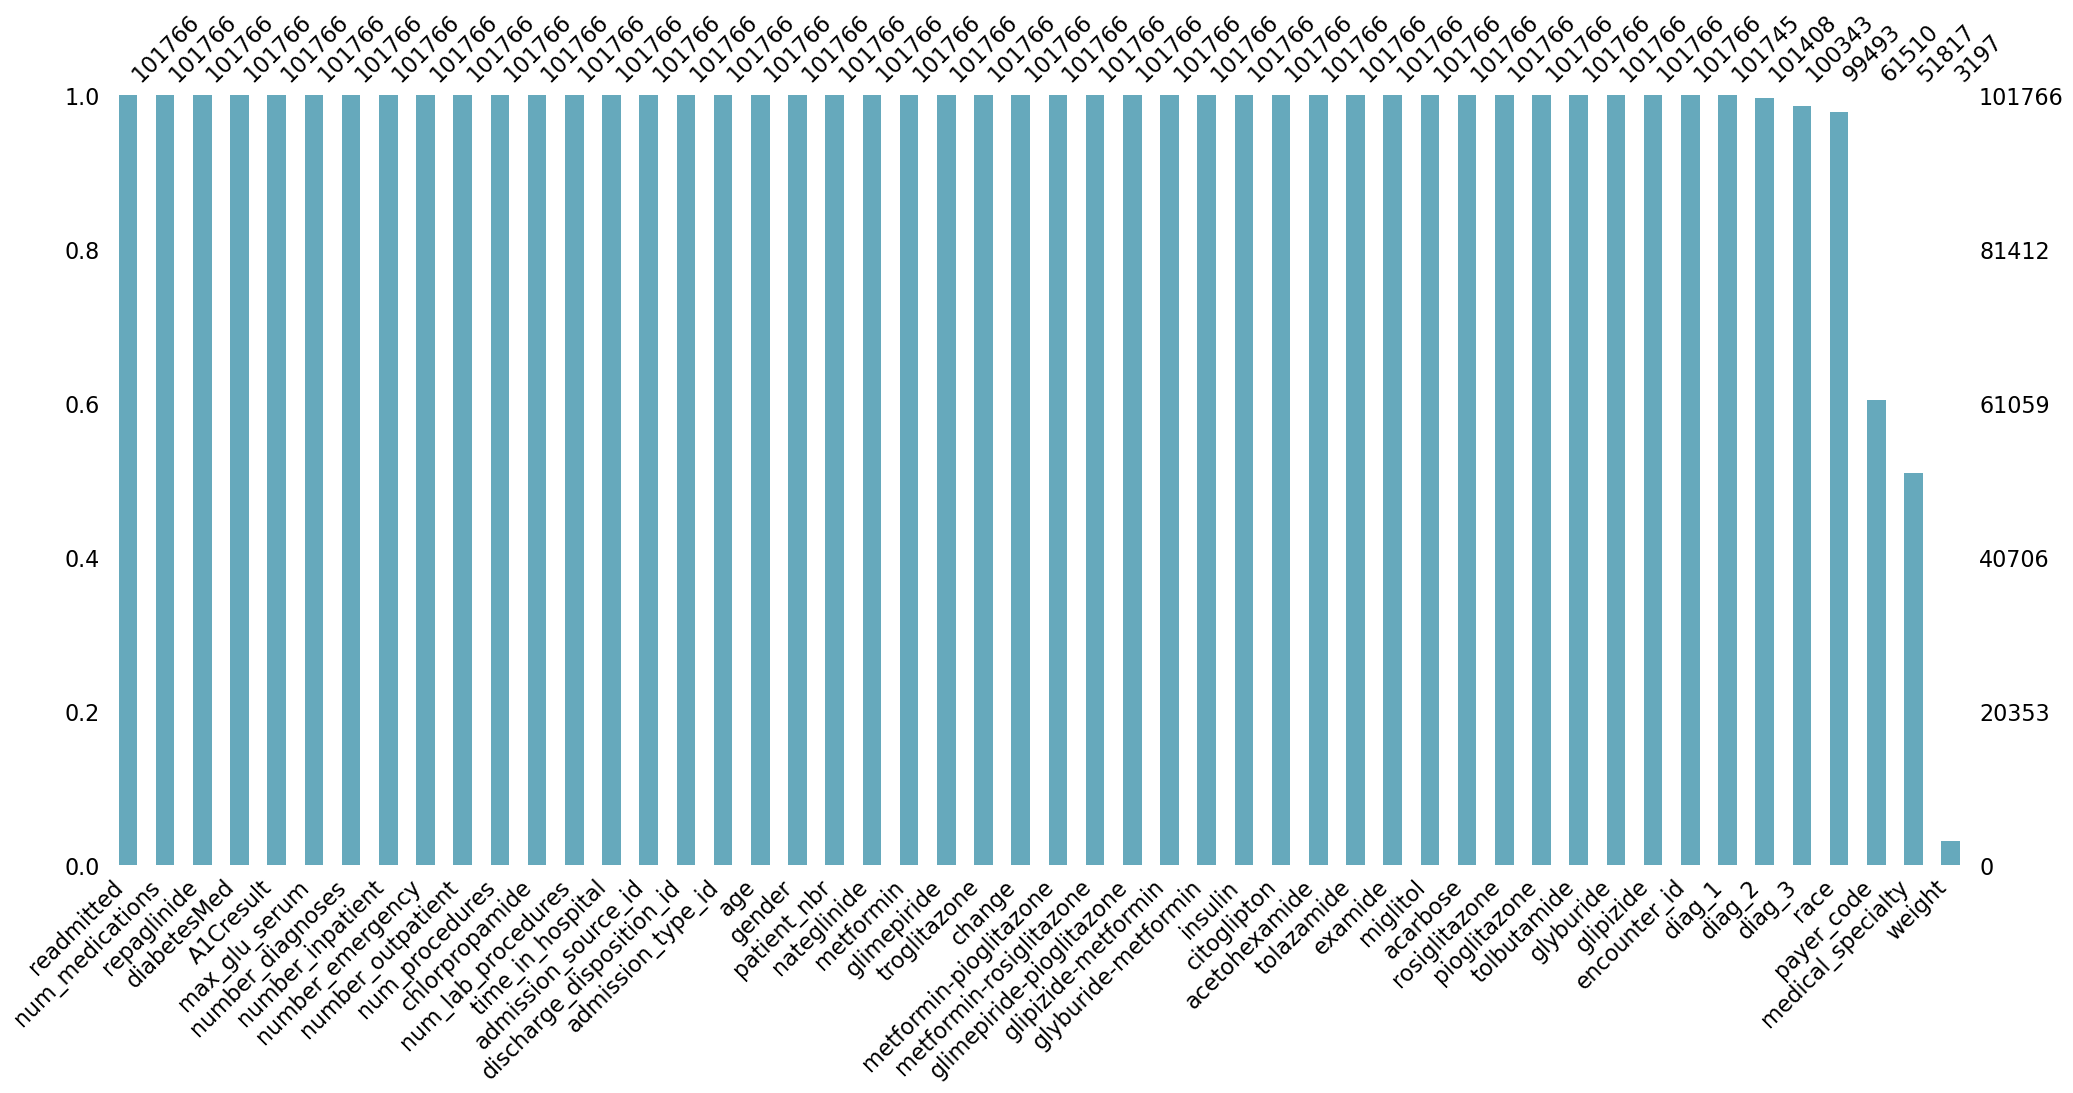

In [83]:
msno.bar(data,sort='descending',color='#66a9bc')
plt.show()

## Representation of missing values, unique values, etc.

In [84]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [85]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
weight,101766,98569,0.9686,object,"[nan, [75-100), [50-75), [0-25), [100-125), [2...",10
medical_specialty,101766,49949,0.4908,object,"[Pediatrics-Endocrinology, nan, InternalMedici...",73
payer_code,101766,40256,0.3956,object,"[nan, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, ...",18
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3


## Types of data measurement scales

In [86]:
data_dictionary = pd.read_csv('var.csv', sep=';')
data_dictionary = data_dictionary.set_index("variable_name")
data_dictionary.head()

,Variable_Structure
variable_name,
weight,numeric
medical_specialty,nominal
payer_code,nominal
race,nominal
diag_3,nominal


In [87]:
data_info['Variable_Structure'] = np.array(data_dictionary["Variable_Structure"])
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value,Variable_Structure
Variable,,,,,,,
weight,101766,98569,0.9686,object,"[nan, [75-100), [50-75), [0-25), [100-125), [2...",10,numeric
medical_specialty,101766,49949,0.4908,object,"[Pediatrics-Endocrinology, nan, InternalMedici...",73,nominal
payer_code,101766,40256,0.3956,object,"[nan, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, ...",18,nominal
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6,nominal
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790,nominal
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749,nominal
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717,nominal
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766,numeric
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3,nominal


Columns that would not give information were removed

In [88]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
data.drop(drop_list,axis=1, inplace=True)
data_info.drop(drop_list, axis=0,inplace=True)

## Determination of numerical columns:

In [89]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="numeric")].index)
len(numerical_columns), numerical_columns

(8,
 ['num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses'])

## Determination of categorical columns:

In [90]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="nominal")].index)
len(categorical_columns), categorical_columns

(35,
 ['race',
  'diag_3',
  'diag_2',
  'diag_1',
  'tolazamide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'acetohexamide',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'glipizide',
  'repaglinide',
  'glimepiride',
  'gender',
  'age',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'chlorpropamide',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'nateglinide',
  'readmitted'])

# <a id="2"></a>2. Visualization

## Outlier Visualization With BoxPlot:

In [91]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

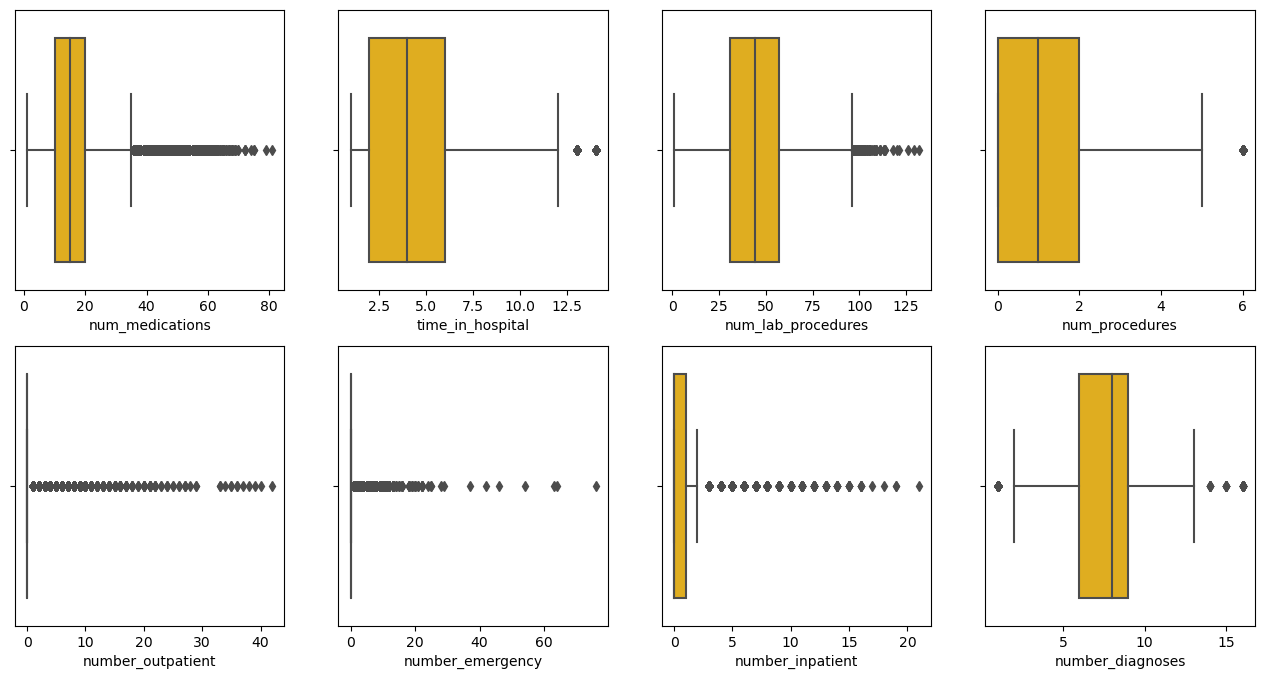

In [92]:
boxplot_for_outlier(data,numerical_columns)

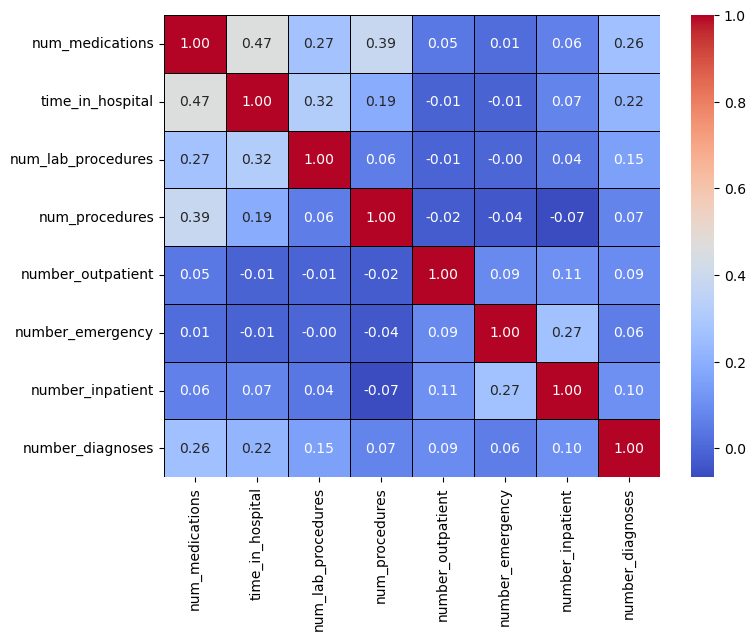

In [93]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

## Gender Distribution

In [94]:
data.gender.replace('Unknown/Invalid', np.nan , inplace=True)
data.dropna(subset=['gender'], how='all', inplace = True)

In [95]:
data.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

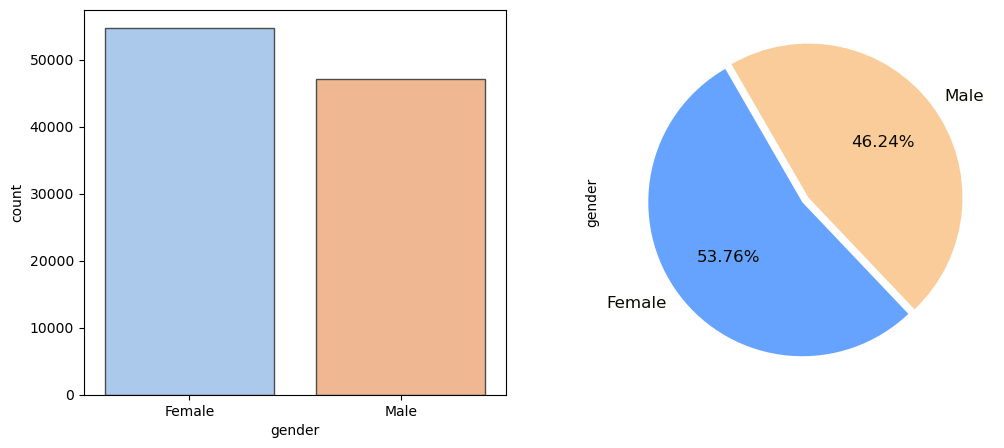

In [96]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=data.gender, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

### Gender, Age and Race Visualization

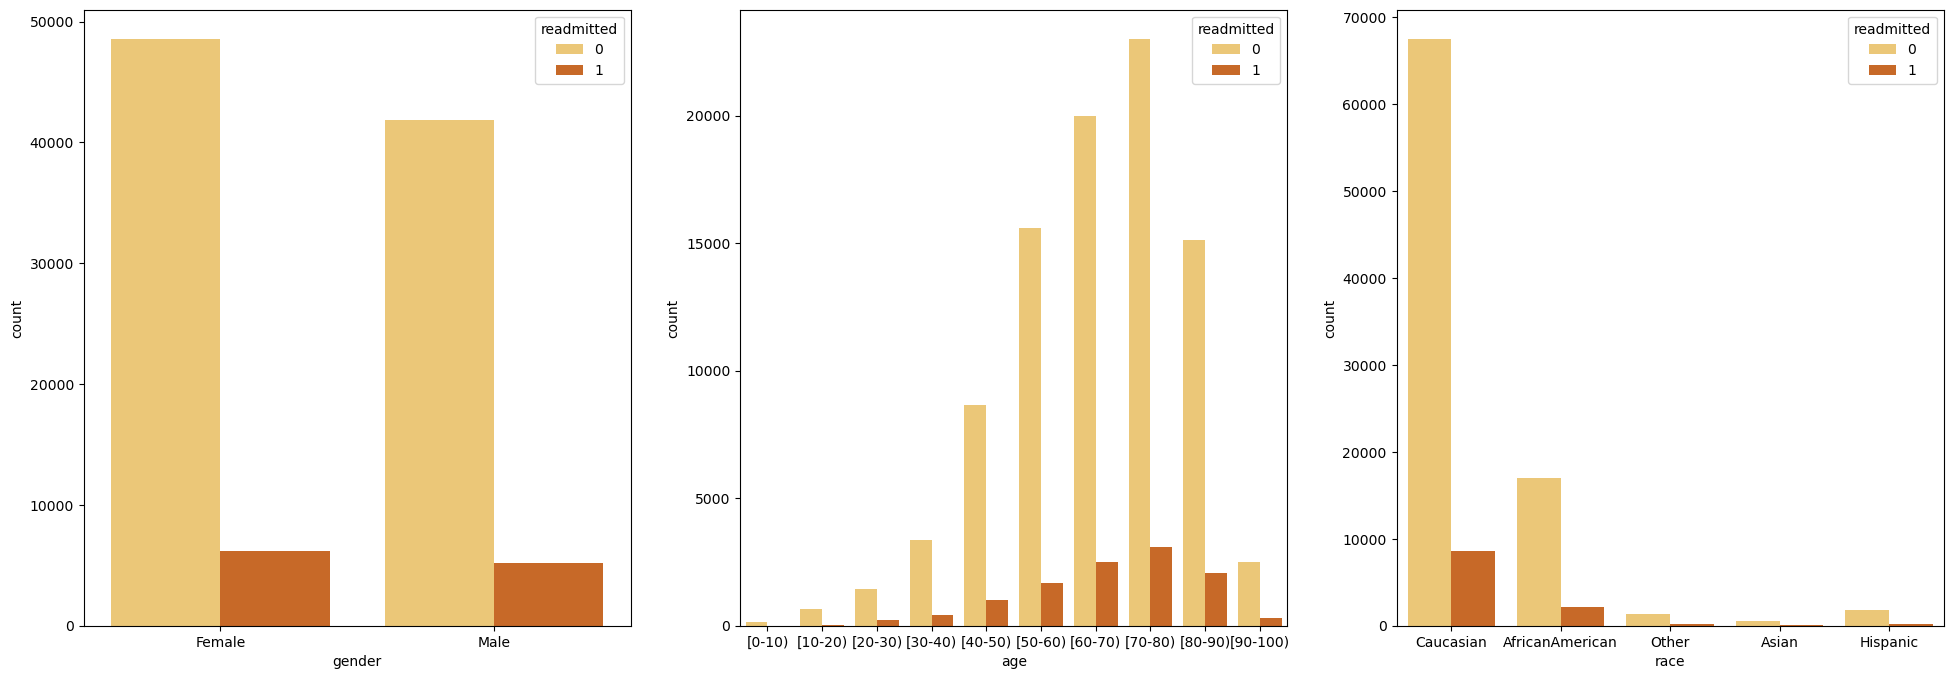

In [97]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(data[i], hue=data.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

### Examination and visualization of the effect of the target variable on insulin variable

In [98]:
data.groupby(by = "insulin").readmitted.mean()

insulin
Down      0.138975
No        0.100380
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

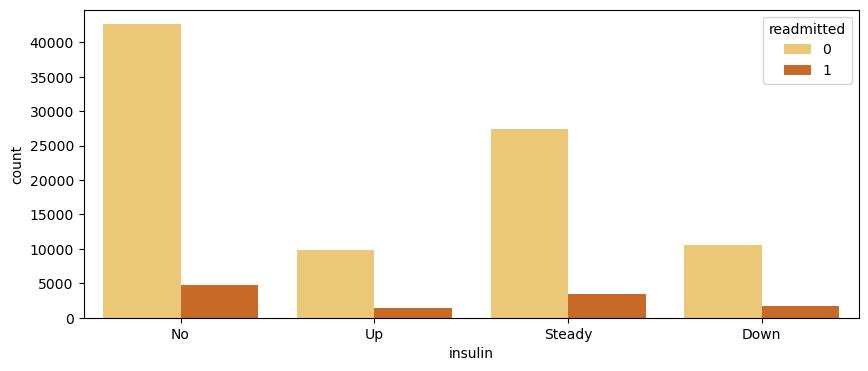

In [99]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="insulin", hue="readmitted", data=data, palette="YlOrBr")
plt.show()

### Visualization of the insulin variable according to the age variable:

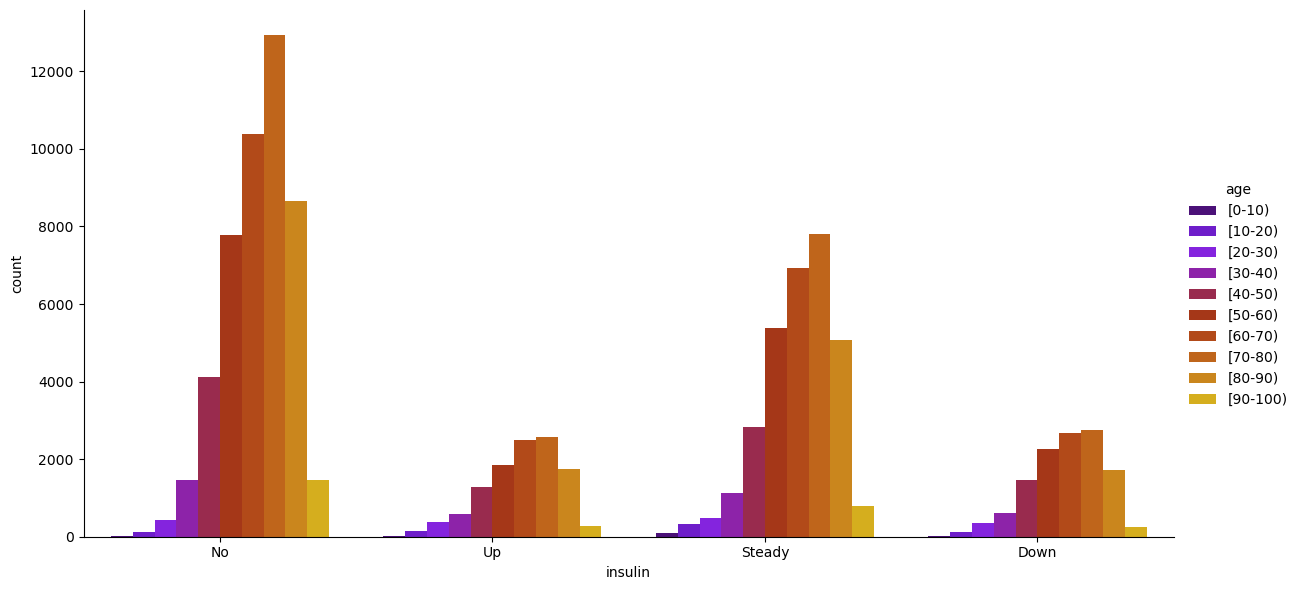

In [100]:
age_list = list(data.age.unique())
sns.catplot(x="insulin", hue="age", data=data, kind="count", height=6, aspect=2, palette="gnuplot");

# <a id="3"></a>3. Feature Engineering

## Missing Value Filling

In [101]:
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [102]:
data["race"].isnull().sum()

0

In [103]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

### Diagnostics 1-2-3 Transform

In [104]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    data[col].fillna('NaN', inplace=True)

In [105]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [106]:
for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [107]:
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

### Distribution of Diag_1, Diag_2 and Diag_3 Variables by Target Variable:

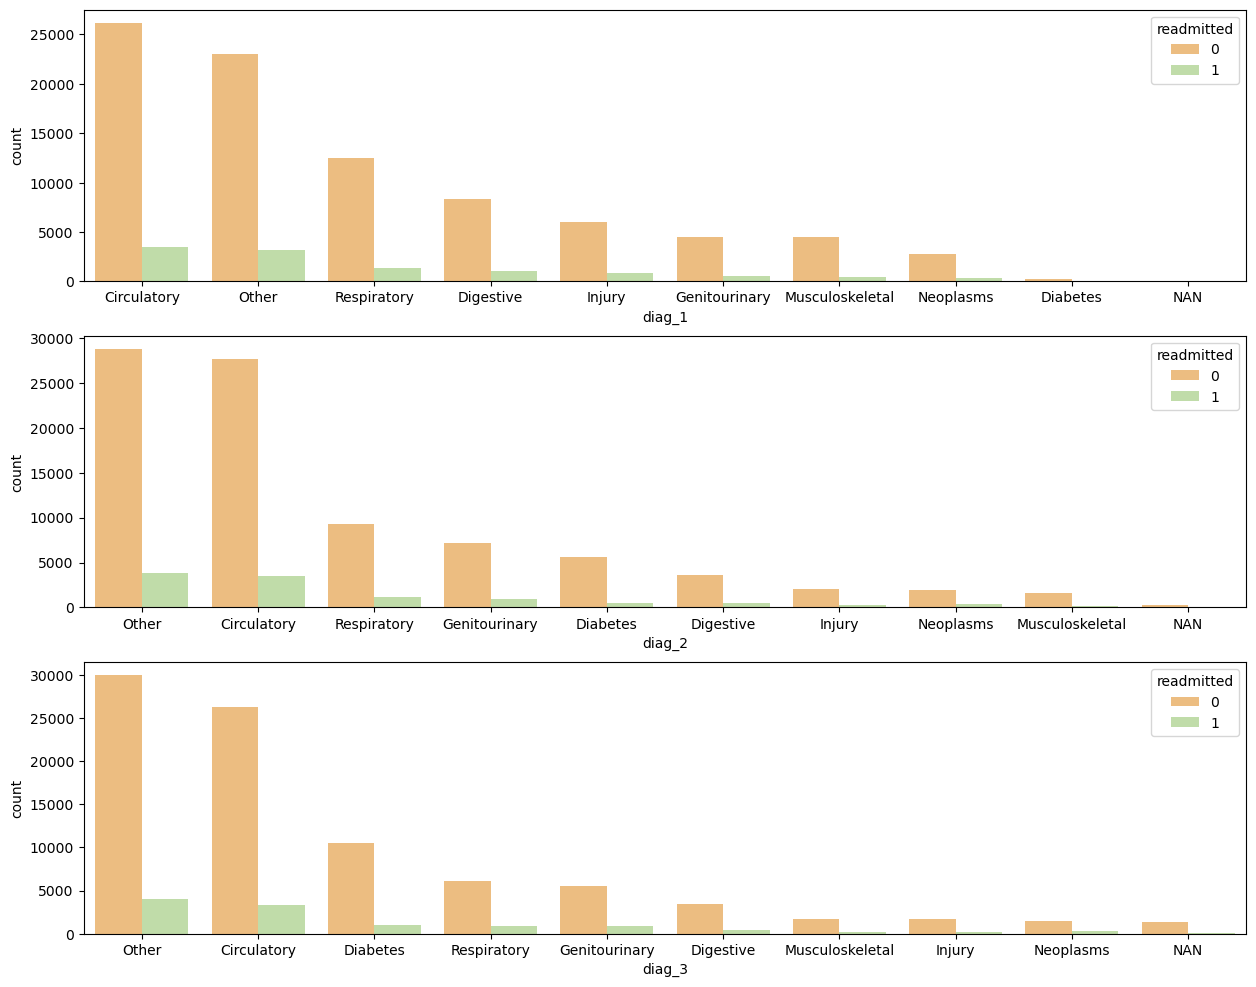

In [108]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(data[i], hue=data.readmitted, palette='Spectral', ax=ax[count], order = data[i].value_counts().index);
    count = count+1

## Local Outlier Factor

In [109]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(data[numerical_columns])

array([-1, -1,  1, ..., -1,  1,  1])

In [110]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

array([-1.57313218e+00, -5.00000000e+09, -1.21803487e+00, -1.10355339e+00,
       -1.00000000e+00, -9.26776695e-01, -1.05618622e+00, -1.29289322e+00,
       -9.78217732e-01, -1.19553853e+00, -8.53553391e-01, -1.00000000e+00,
       -1.29289322e+00, -1.10024845e+00, -1.14322501e+00, -1.05511154e+00,
       -1.20710678e+00, -8.53553391e-01, -8.53553391e-01, -9.26776695e-01,
       -1.29289322e+00, -1.00000000e+00, -5.00000000e+09, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.05618622e+00, -1.00000000e+00,
       -1.07647405e+00, -1.10355339e+00])

In [111]:
np.sort(df_scores)[0:30]

array([-4.00000000e+10, -3.51776695e+10, -2.79110350e+10, -2.44948974e+10,
       -2.23606798e+10, -2.23606798e+10, -2.23536866e+10, -2.00000000e+10,
       -2.00000000e+10, -1.75000000e+10, -1.73205081e+10, -1.73205081e+10,
       -1.73205081e+10, -1.65659482e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10])

In [112]:
threshold_value = np.sort(df_scores)[2]

In [113]:
outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [114]:
new_df = data[df_scores > threshold_value]

In [115]:
data[df_scores < threshold_value]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93655,Caucasian,Female,[70-80),3,6,1,5,35,0,15,...,No,Up,No,No,No,No,No,Ch,Yes,0
97761,Caucasian,Male,[60-70),1,1,7,3,65,0,8,...,No,No,No,No,No,No,No,No,No,0


In [116]:
# Custom encoding for the 21 Drug Features
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drugs:
    data[col] = data[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    data[col] = data[col].astype(int)

In [117]:
# A1Cresult and max_glu_serum
data['A1Cresult'] = data['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
data['max_glu_serum'] = data['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

In [118]:
# One hot Encoding Race and Id's 
one_hot_data = pd.get_dummies(data, columns=['race'], prefix=["enc"])

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

# <a id="4"></a>4. Train-Test Splitting

In [119]:
df = one_hot_data.copy()
X = df.drop(columns="readmitted", axis=1)
Y = df.readmitted

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

## Encoding

In [121]:
ordinal_enc = OrdinalEncoder()
X_train.age = ordinal_enc.fit_transform(X_train.age.values.reshape(-1, 1))
X_test.age = ordinal_enc.transform(X_test.age.values.reshape(-1, 1))

In [122]:
for col in diag_list:
    label_enc = LabelEncoder()
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.fit_transform(X_test[col]) 

In [123]:
binary = ['change', 'diabetesMed', 'gender']

from category_encoders import BinaryEncoder
binary_enc = BinaryEncoder(cols=binary)
binary_enc.fit_transform(X_train)
X_train = binary_enc.fit_transform(X_train)
X_test = binary_enc.transform(X_test)

### Resampling techniques — Undersample majority class

Since we have an unbalanced dataset, We will use sampling technique.

In [124]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

0    9077
1    9077
Name: readmitted, dtype: int64

In [125]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

## Train-Validation Splitting

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [127]:
def knn(X_train, X_test, Y_train, Y_test):

    model = KNeighborsClassifier(p=1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    return accuracy_score(Y_test, Y_pred), tn, fp, fn, tp

# Naive Bayes
def nb(X_train, X_test, Y_train, Y_test):

    model = GaussianNB()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    return accuracy_score(Y_test, Y_pred), tn, fp, fn, tp


def temporal_data_split(data, target, train_size=0.95):

    lim = round(len(data)*train_size)
    tmp_data_train = data.loc[0:lim]
    tmp_data_test = data.loc[lim:]
    X_train = tmp_data_train.drop(target,axis=1) 
    Y_train = tmp_data_train[target] 
    X_test = tmp_data_test.drop(target,axis=1)
    Y_test = tmp_data_test[target]
    return X_train, X_test, Y_train, Y_test

In [128]:
df = one_hot_data.copy()

df["gender"]=df["gender"].replace({"Female":1,"Male":0})

df.age = df.age.replace({"[70-80)":75,"[60-70)":65,"[50-60)":55,"[80-90)":85,"[40-50)":45,"[30-40)":35,"[90-100)":95,"[20-30)":25,"[10-20)":15,"[0-10)":5})

df = df.drop(['diag_1','diag_2','diag_3','change','diabetesMed'], axis=1)




In [129]:
dataWithoutOutliers = df

std_scaler = StandardScaler()
tmp_dataWithoutOutliers = dataWithoutOutliers.drop('readmitted', axis=1)
data_std = std_scaler.fit_transform(tmp_dataWithoutOutliers)
data_std = pd.DataFrame(data_std, columns=tmp_dataWithoutOutliers.columns)
data_std['readmitted'] = dataWithoutOutliers['readmitted']


In [130]:
data_std.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,readmitted
0,0.926510,-3.809535,-1.138455,-0.097257,-0.783548,-1.850433,-0.291867,-0.211625,-0.500584,-3.298205,...,-0.010991,-0.004487,-0.043195,-0.180012,-0.090443,-0.15185,-1.133181,-0.012289,-0.035495,0.0
1,0.926510,-3.182390,-0.464686,0.820652,-0.783548,0.249657,-0.291867,-0.211625,-0.500584,0.823423,...,-0.010991,-0.004487,-0.043195,-0.180012,-0.090443,-0.15185,0.882472,-0.012289,-0.035495,0.0
2,0.926510,-2.555246,-0.801570,-1.627106,2.152858,-0.368016,1.288969,-0.211625,0.292792,-0.722187,...,-0.010991,-0.004487,-0.043195,-0.180012,-0.090443,-0.15185,0.882472,-0.012289,-0.035495,0.0
3,-1.079319,-1.928101,-0.801570,0.055727,-0.196267,0.002588,-0.291867,-0.211625,-0.500584,-0.206984,...,-0.010991,-0.004487,-0.043195,-0.180012,-0.090443,-0.15185,0.882472,-0.012289,-0.035495,0.0
4,-1.079319,-1.300956,-1.138455,0.412692,-0.783548,-0.985690,-0.291867,-0.211625,-0.500584,-1.237391,...,-0.010991,-0.004487,-0.043195,-0.180012,-0.090443,-0.15185,0.882472,-0.012289,-0.035495,0.0


In [131]:
# stats
X_train, X_test, Y_train, Y_test = temporal_data_split(data_std, 'readmitted')
knn_acc, knn_tn, knn_fp, knn_fn, knn_tp = knn(X_train, X_test, Y_train, Y_test)
nb_acc, nb_tn, nb_fp, nb_fn, nb_tp  = nb(X_train, X_test, Y_train, Y_test)

test_scaling_stats.loc[0] = ['standardization', 
                            knn_acc, knn_tn, knn_fp, knn_fn, knn_tp,
                            nb_acc, nb_tn, nb_fp, nb_fn, nb_tp]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#knn = KNeighborsClassifier(p=1)

#feature_names = np.array(data_std.drop)

#X_train, X_test, Y_train, Y_test = temporal_data_split(data_std, 'readmitted')
#X = data_std.drop('readmitted', axis=1)
#y = data_std['readmitted']

#sfs_forward_knn = SequentialFeatureSelector(
    #knn, n_features_to_select=50, direction="forward"
#).fit(X, y)

#sfs_backward_knn = SequentialFeatureSelector(
    #knn, n_features_to_select=50, direction="backward"
#).fit(X, y)

In [ ]:
knn_acc, knn_tn, knn_fp, knn_fn, knn_tp = knn(X_train, X_test, Y_train, Y_test)

In [ ]:
features_selection_scaling_stats = pd.DataFrame(columns=['estimator', 'direction',
                                                'knn_accuracy', 'knn_tn', 'knn_fp', 'knn_fn', 'knn_tp', 
                                                'nb_accuracy', 'nb_tn', 'nb_fp', 'nb_fn', 'nb_tp'])

In [ ]:
nb_acc, nb_tn, nb_fp, nb_fn, nb_tp  = nb(X_train, X_test, Y_train, Y_test)


features_selection_scaling_stats.loc[0] = ['knn', 'forward', 
                                          knn_acc, knn_tn, knn_fp, knn_fn, knn_tp,
                                          nb_acc, nb_tn, nb_fp, nb_fn, nb_tp]

In [ ]:
features_selection_scaling_stats